# Descriptive Statistics

## Introduction

Descriptive statistics are brief informational coefficients that summarize a given data set, which can be either a representation of the entire population or a sample of a population. Descriptive statistics are broken down into measures of central tendency (mean, median, mode) and measures of variability (spread, including concepts such as standard deviation, variance, minimum and maximum variables, kurtosis, and skewness).

This notebook provides an in-depth exploration of descriptive statistics, an essential aspect of data science. 
It covers data types, visualization techniques, summary statistics, and measures of dispersion using realistic datasets.

## Index
1. [Types of Data](#1-types-of-data)
   1. [Visualization of Categorical variables](#11-visualization-of-categorical-variables)
      1. [Cross Tables](#111-cross-tables)
   2. [Visualization of Numerical variables](#12-visualization-of-numerical-variables---fdt)
      1. [Histograms](#121-histograms)
      2. [Scatter plots](#122-scatter-plots)
2. [Measures of Central Tendency](#2-measures-of-central-tendency)
3. [Measures of Variability](#3-measures-of-variability)

**Libraries used:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## 1. Types of Data

Data can be broadly classified into two types:
- **Qualitative (Categorical) Data:** Non-numeric data that represents categories, e.g., gender, colors, names.
- **Quantitative (Numerical) Data:** Numeric data representing counts or measurements, e.g., age, weight, temperature.

In [8]:
np.random.seed(42)
data = pd.DataFrame({
    "Category": np.random.choice(["A", "B", "C"], 100),
    "Value": np.random.normal(50, 15, 100),
    "Score": np.random.randint(1, 100, 100)
})


data.head()

,Category,Value,Score
0,C,58.731842,2
1,A,63.316227,1
2,C,63.414985,48
3,C,61.324967,12
4,A,46.892512,69


### 1.1 Visualization of categorical variables

Categorical data can be visualized using various graphical representations such as bar charts, pie charts, and count plots.

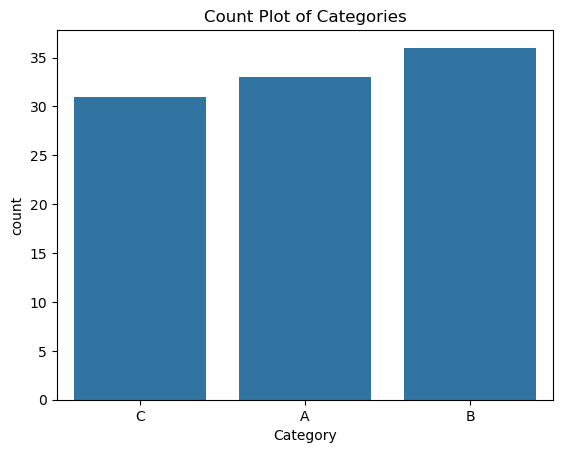

In [9]:
sns.countplot(x="Category", data=data)
plt.title("Count Plot of Categories")
plt.show()

#### 1.1.1 Cross Tables

Cross tables (contingency tables) show the frequency distribution between two or more categorical variables. These enable you to examine relationships within the data that might not be readily apparent when analyzing total survey responses, for example:

In [10]:
cross_table = pd.crosstab(data["Category"], pd.cut(data["Score"], bins=4))
print("Cross Table:")
print(cross_table)

Cross Table:
Score     (0.902, 25.5]  (25.5, 50.0]  (50.0, 74.5]  (74.5, 99.0]
Category                                                         
A                    12            10             5             6
B                     7            10             7            12
C                     8            10             7             6


### 1.2 Visualization of numerical variables - FDT

A Frequency Distribution Table (FDT) displays the number of occurrences of different values within a dataset. It helps us to find patterns in the data and also enables us to analyze the data using measures of central tendency and variance:

In [11]:
freq_table = pd.cut(data["Value"], bins=5).value_counts().sort_index()
print("Frequency Distribution Table:")
print(freq_table)

Frequency Distribution Table:
Value
(10.082, 28.255]      5
(28.255, 46.337]     35
(46.337, 64.42]      43
(64.42, 82.502]      15
(82.502, 100.584]     2
Name: count, dtype: int64


#### 1.2.1 Histograms

Histograms help visualize the distribution of numerical data. It is often used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations):

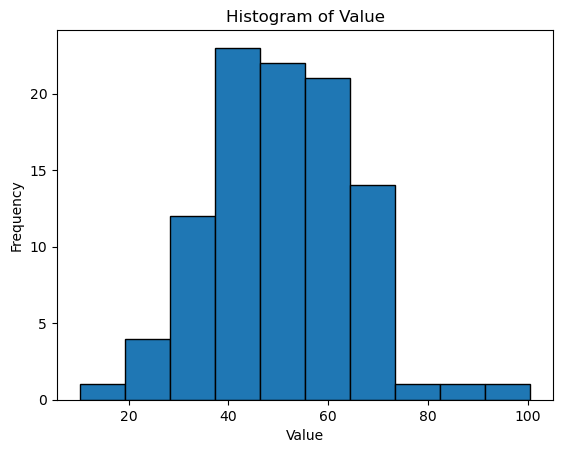

In [12]:
plt.hist(data["Value"], bins=10, edgecolor='black')
plt.title("Histogram of Value")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

#### 1.2.2 Scatter plots

Scatter plots visualize relationships between numerical variables:

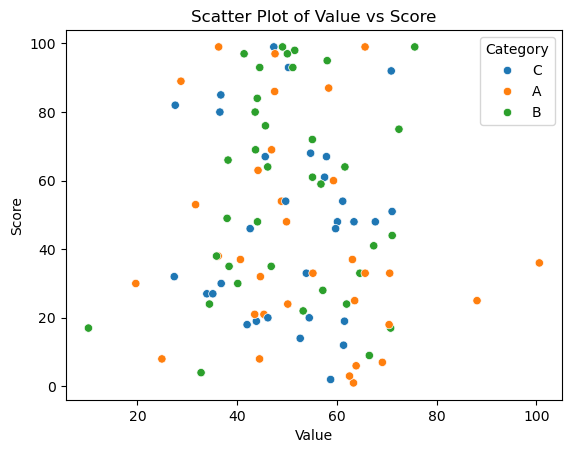

In [16]:
sns.scatterplot(x=data["Value"], y=data["Score"], hue=data["Category"])
plt.title("Scatter Plot of Value vs Score")
plt.show()

## 2. Measures of Central Tendency

As presented in the introduction, these measures consist on the concepts of mean, median and mode:

- **Mean:** The arithmetic average of the dataset.
- **Median:** The middle value when data is sorted.
- **Mode:** The most frequently occurring value.

These measures are essential for summarizing a set of data by identifying the central point around which all other data points cluster. Here is a quick example, using the initially defined data:

In [17]:
mean_val = np.mean(data["Value"])
median_val = np.median(data["Value"])
mode_val = stats.mode(data["Value"])[0]
print(f"Mean: {mean_val}, Median: {median_val}, Mode: {mode_val}")


Mean: 51.35411320901779, Median: 50.09811237628655, Mode: 10.172359286547952


## 3. Measures of variability

These measures facilitate the use of other statistical techniques such as correlation, regression analysis, etc. These include concepts such as:

- **Skewness:** measures the asymmetry of the distribution:
  - **Positive skew:** Right tail is longer.
  - **Negative skew:** Left tail is longer.
- **Kurtosis:** measures the "tailedness" of the distribution:
  - **High kurtosis:** Heavy tails, more outliers.
  - **Low kurtosis:** Light tails, fewer outliers.
- **Variance:** A measure of how data points differ from the mean
- **Standard Deviation:** Square root of variance, a statistic measuring the dispersion of a dataset relative to its mean.
- **Coefficient of Variation:** Standard deviation divided by mean, useful for comparing variability.
- **Covariance:** Measures the joint variability of two variables.
- **Correlation Coefficient:** Scaled measure of covariance between -1 and 1.

Below is the calculation in code of these metrics about the data defined previously:

In [18]:
#Skewness
skewness = stats.skew(data["Value"])
print(f"Skewness: {skewness}")

#Kurtosis
kurtosis = stats.kurtosis(data["Value"])
print(f"Kurtosis: {kurtosis}")

#Variance and Standard Deviation
variance = np.var(data["Value"], ddof=1)
std_dev = np.std(data["Value"], ddof=1)
cv = std_dev / mean_val
print(f"Variance: {variance}, Standard Deviation: {std_dev}, Coefficient of Variation: {cv}")

#Covariance and Correlation
cov_matrix = np.cov(data["Value"], data["Score"])
corr_coef = np.corrcoef(data["Value"], data["Score"])[0, 1]
print(f"Covariance Matrix:\n{cov_matrix}")
print(f"Correlation Coefficient: {corr_coef}")

Skewness: 0.194163853456917
Kurtosis: 0.8102365930259632
Variance: 206.90027116209285, Standard Deviation: 14.384028335695563, Coefficient of Variation: 0.2800949609849309
Covariance Matrix:
[[206.90027116 -25.69777398]
 [-25.69777398 858.19585859]]
Correlation Coefficient: -0.060984823022919306


## 4. Extra resources

If you want to go more in depth about this subject, you can check out these links or search for more information as well:
- [Khan Academy: Statistics and Probability](https://www.khanacademy.org/math/statistics-probability)
- [Invesopedia](https://www.investopedia.com/terms/d/descriptive_statistics.asp)